# imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, classification_report, accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# b

In [3]:
df = pd.read_csv('anti-malware .csv')
df

,NtDuplicateObject,NtOpenSection,CoUninitialize,RegCloseKey,LdrUnloadDll,DrawTextExW,GetSystemInfo,RegQueryValueExA,getaddrinfo,WSAStartup,...,CreateRemoteThreadEx,NtCreateDirectoryObject,EnumServicesStatusA,NtShutdownSystem,NtCreateProcessEx,NotifyBootConfigStatus,NtSaveKey,system,WNetGetProviderNameW,OUTPUT
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,10,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5,2,2,96,2,15,3,116,2,1,...,0,0,0,0,0,0,0,0,0,1
3,9,13,5,662,37,0,0,405,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,2,2,94,3,17,4,116,2,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,204,41,109,2680,77,102,24,148,0,12,...,0,0,0,0,0,0,0,0,0,1
11257,197,39,107,2525,73,135,24,148,0,12,...,0,0,0,0,0,0,0,0,0,1
11258,198,39,109,2534,72,162,22,188,0,11,...,0,0,0,0,0,0,0,0,0,1
11259,13,0,3,481,29,0,101,171,10,5,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]
X_df

,NtDuplicateObject,NtOpenSection,CoUninitialize,RegCloseKey,LdrUnloadDll,DrawTextExW,GetSystemInfo,RegQueryValueExA,getaddrinfo,WSAStartup,...,DnsQuery_UTF8,CreateRemoteThreadEx,NtCreateDirectoryObject,EnumServicesStatusA,NtShutdownSystem,NtCreateProcessEx,NotifyBootConfigStatus,NtSaveKey,system,WNetGetProviderNameW
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,10,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,2,2,96,2,15,3,116,2,1,...,0,0,0,0,0,0,0,0,0,0
3,9,13,5,662,37,0,0,405,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,2,2,94,3,17,4,116,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,204,41,109,2680,77,102,24,148,0,12,...,0,0,0,0,0,0,0,0,0,0
11257,197,39,107,2525,73,135,24,148,0,12,...,0,0,0,0,0,0,0,0,0,0
11258,198,39,109,2534,72,162,22,188,0,11,...,0,0,0,0,0,0,0,0,0,0
11259,13,0,3,481,29,0,101,171,10,5,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, _, y_train, _ = train_test_split(X_df, y_df, test_size=0.5, stratify=y_df, random_state=42)
X_train.shape, y_train.shape

((5630, 311), (5630,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4504, 311), (1126, 311), (4504,), (1126,))

# c

In [7]:
def show_report_model(y_true, pred):
    print(classification_report(y_test, pred))
    print("******")
    cm = confusion_matrix(y_true, pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(f'confusion_matrix \n')
    plt.show(block=False)

In [8]:
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Bagging with KNN

In [14]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=10, random_state=0).fit(
    X_train, y_train)

In [15]:
pred = clf.predict(X_test)
pred.shape, y_test.shape

((1126,), (1126,))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       240
           1       0.97      0.97      0.97       886

    accuracy                           0.95      1126
   macro avg       0.93      0.92      0.93      1126
weighted avg       0.95      0.95      0.95      1126

******
confusion_matrix 



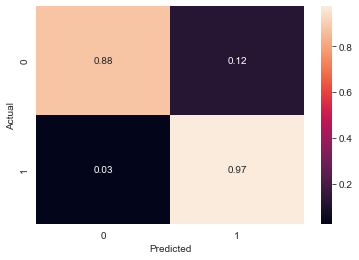

In [16]:
show_report_model(y_test, pred)

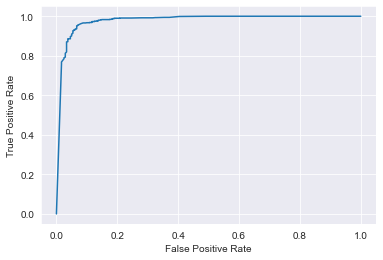

In [17]:
pred_prob = clf.predict_proba(X_test)
plot_roc_curve(y_test, pred_prob[:, 1])

Bagging with tree

In [9]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=25, random_state=0), n_estimators=10, random_state=0).fit(
    X_train, y_train)

In [10]:
# clf = DecisionTreeClassifier(max_depth=25, random_state=0)
# clf.fit(X_train, y_train)
pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       240
           1       0.98      0.97      0.98       886

    accuracy                           0.97      1126
   macro avg       0.95      0.96      0.95      1126
weighted avg       0.97      0.97      0.97      1126

******
confusion_matrix 



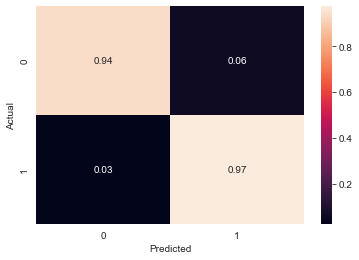

In [11]:
show_report_model(y_test, pred)

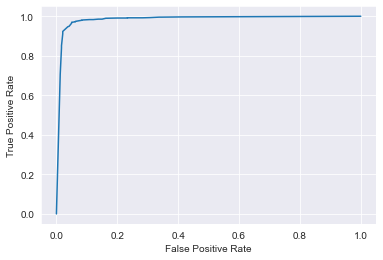

In [12]:
pred_prob = clf.predict_proba(X_test)
plot_roc_curve(y_test, pred_prob[:, 1])

# d

In [21]:
clf = AdaBoostClassifier(base_estimator=SVC(), n_estimators=20, algorithm='SAMME').fit(
    X_train, y_train)
pred = clf.predict(X_test)
pred.shape, y_test.shape

((1126,), (1126,))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       240
           1       0.79      1.00      0.88       886

    accuracy                           0.79      1126
   macro avg       0.39      0.50      0.44      1126
weighted avg       0.62      0.79      0.69      1126

******
confusion_matrix 



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


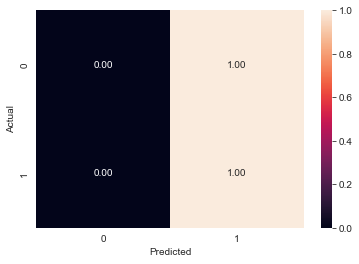

In [22]:
show_report_model(y_test, pred)

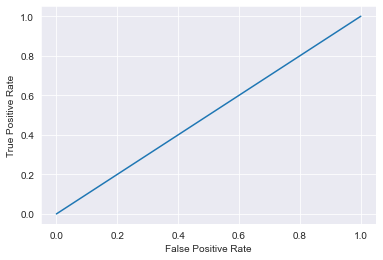

In [23]:
pred_prob = clf.predict_proba(X_test)
plot_roc_curve(y_test, pred_prob[:, 1])

In [24]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25), n_estimators=20).fit(
    X_train, y_train)
pred = clf.predict(X_test)
pred.shape, y_test.shape

((1126,), (1126,))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       240
           1       0.98      0.98      0.98       886

    accuracy                           0.97      1126
   macro avg       0.96      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126

******
confusion_matrix 



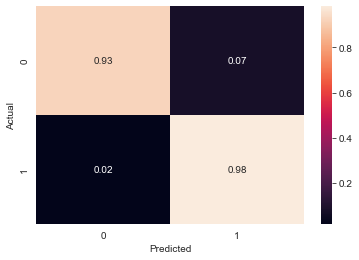

In [25]:
show_report_model(y_test, pred)
pred_prob = clf.predict_proba(X_test)

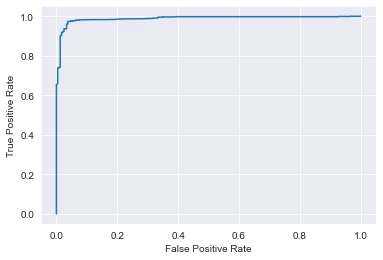

In [26]:
plot_roc_curve(y_test, pred_prob[:, 1])

# e

In [27]:
X_train

,NtDuplicateObject,NtOpenSection,CoUninitialize,RegCloseKey,LdrUnloadDll,DrawTextExW,GetSystemInfo,RegQueryValueExA,getaddrinfo,WSAStartup,...,DnsQuery_UTF8,CreateRemoteThreadEx,NtCreateDirectoryObject,EnumServicesStatusA,NtShutdownSystem,NtCreateProcessEx,NotifyBootConfigStatus,NtSaveKey,system,WNetGetProviderNameW
613,5,3,1,40,9,0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4330,42,32,117,1692,120,2,4,6,1,1,...,0,0,0,0,0,0,0,0,0,0
982,272,75,76,612,2058,160,46,72,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7242,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6345,19,9,11,671,22,51,12,231,0,5,...,0,0,0,0,0,0,0,0,0,0
2568,12,0,0,28,5,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6929,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

dataset = []
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.05, random_state=0)

for i, (_, sample) in enumerate(sss.split(X_train, y_train)):
    dataset.append(sample)

# F

make trees

In [30]:
models = []
dataset_counter = 0
while dataset_counter < 55:
    X_train_sample = X_train.iloc[dataset[dataset_counter], :]
    y_train_sample = y_train.iloc[dataset[dataset_counter]]
    clf = DecisionTreeClassifier(max_depth=25, random_state=0)
    clf.fit(X_train_sample, y_train_sample)
    models.append(clf)
    dataset_counter += 1

len(models)

55

Add SVC

In [31]:
while dataset_counter < 75:
    X_train_sample = X_train.iloc[dataset[dataset_counter], :]
    y_train_sample = y_train.iloc[dataset[dataset_counter]]
    clf = SVC()
    clf.fit(X_train_sample, y_train_sample)
    models.append(clf)
    dataset_counter += 1

len(models)

75

add multi nomial

In [32]:
while dataset_counter < 90:
    X_train_sample = X_train.iloc[dataset[dataset_counter], :]
    y_train_sample = y_train.iloc[dataset[dataset_counter]]
    clf = MultinomialNB()
    clf.fit(X_train_sample, y_train_sample)
    models.append(clf)
    dataset_counter += 1

len(models)

90

In [33]:
while dataset_counter < 95:
    X_train_sample = X_train.iloc[dataset[dataset_counter], :]
    y_train_sample = y_train.iloc[dataset[dataset_counter]]
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train_sample, y_train_sample)
    models.append(clf)
    dataset_counter += 1

len(models)

95

In [34]:
while dataset_counter < 100:
    X_train_sample = X_train.iloc[dataset[dataset_counter], :]
    y_train_sample = y_train.iloc[dataset[dataset_counter]]
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train_sample, y_train_sample)
    models.append(clf)
    dataset_counter += 1

len(models)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100

In [36]:
matrix_100_D = []
for model in models:
    matrix_100_D.append(model.predict(X_test))

matrix_100_D = np.array(matrix_100_D)
matrix_100_D

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]], dtype=int64)

In [37]:
matrix_100_D = matrix_100_D.transpose()
matrix_100_D

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [38]:
matrix_100_D.shape

(1126, 100)

In [39]:
pred_100 = []
for i in range(0, matrix_100_D.shape[0]):
    sum = 0
    for j in range(0, matrix_100_D.shape[1]):
        sum += matrix_100_D[i, j]

    if sum > len(models) / 2:
        pred_100.append(1)
    else:
        pred_100.append(0)

pred_100 = np.array(pred_100)
# matrix_101_101.append(last_D)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       240
           1       0.95      0.99      0.97       886

    accuracy                           0.95      1126
   macro avg       0.95      0.90      0.92      1126
weighted avg       0.95      0.95      0.95      1126

******
confusion_matrix 



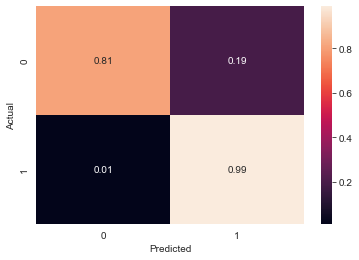

In [40]:
show_report_model(y_test, pred_100)

# G

In [65]:
def make_101_D_prediction(data_x, data_label) -> np.ndarray:
    res_100_D = []
    for model in models:
        res_100_D.append(model.predict(data_x))

    res_100_D = np.array(res_100_D)
    res_100_D = res_100_D.transpose()

    data_label = np.array(data_label).reshape((-1, 1))
    res_101_D = np.concatenate((res_100_D, data_label), axis=1)
    return res_101_D

In [66]:
make_101_D_prediction(X_test, y_test)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

# h

svc

In [70]:
test_101D = make_101_D_prediction(X_test, y_test)
test_101D.shape

(1126, 101)

In [67]:
train_101D = make_101_D_prediction(X_train, y_train)
train_101D.shape

(4504, 101)

In [68]:
clf = SVC(gamma='auto').fit(
    train_101D[:, :-1], train_101D [:, -1])


In [71]:
pred = clf.predict(test_101D[:,:-1])

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       240
           1       0.97      0.98      0.97       886

    accuracy                           0.96      1126
   macro avg       0.95      0.93      0.94      1126
weighted avg       0.96      0.96      0.96      1126

******
confusion_matrix 



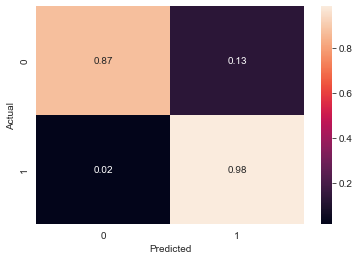

In [72]:
show_report_model(test_101D[:,-1], pred)

LogisticRegression

In [77]:
clf = LogisticRegression(max_iter=10000,random_state=0).fit(
    train_101D[:, :-1], train_101D [:, -1])

In [78]:
pred = clf.predict(test_101D[:,:-1])

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       240
           1       0.97      0.98      0.97       886

    accuracy                           0.96      1126
   macro avg       0.95      0.93      0.94      1126
weighted avg       0.96      0.96      0.96      1126

******
confusion_matrix 



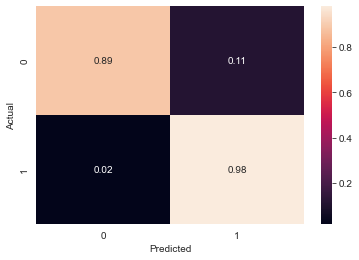

In [79]:
show_report_model(test_101D[:,-1], pred)